# Hidden Markov Models

## Section 1: Introduction to Sequential Data

### What is Sequential Data?
Sequential data is a type of data where the order of the elements matters. Each element in the sequence is dependent on the previous elements, making it essential to consider the temporal or sequential relationships when analyzing such data. Examples of sequential data include time series data, text data, and biological sequences.

### iid vs. Sequential Data
In traditional machine learning, we often assume that data points are independent and identically distributed (iid). This means that each data point is generated independently from the same probability distribution. However, in sequential data, this assumption does not hold true because the elements in the sequence are dependent on each other.

---

We need to identify a model that can capture these dependencies and relationships within the sequence. Generally speaking, **State Space Models** are a good choice for modeling sequential data, as they can represent the underlying states and transitions between them, as well as the fact that future states depend on past states, especially the most recent ones.

# Markov Models
Assuming we have $N$ states, the *product rule* allows us to express the joint probability of a sequence of states as follows:

$$p(x_1,\ldots, x_N) = \prod_{n=1}^{N} p(x_n | x_1, \ldots, x_{n-1})$$

If we assume that each of the states only depends on the previous state (the *Markov assumption*), we can simplify the expression to:

$$p(x_1,\ldots, x_N) = p(x_1) \prod_{n=2}^{N} p(x_n | x_{n-1})$$

Therefore, we obtain a **First-Order Markov Model**. This model captures the dependencies between consecutive states in a sequence, making it suitable for modeling sequential data where the current state is influenced by the immediate past state.

![Screenshot 2025-12-11 152132.png](<attachment:Screenshot 2025-12-11 152132.png>)

>First-Order Markov Model: Each state depends only on the previous state (Image Source: Bishop, "Pattern Recognition and Machine Learning")
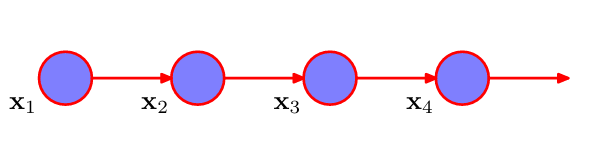

If we use such model, the distribution of the next state only depends on the current state, i.e., will be independent of all previous states. This is called the **Markov Property**.

This is still very restrictive, but we can extend it to a **Higher-Order Markov Model** by assuming that each state depends on the previous $k$ states. For example, in a Second-Order Markov Model, each state depends on the two previous states. The joint probability distribution can be expressed as:

$$p(x_1,\ldots, x_N) = p(x_1) p(x_2 | x_1) \prod_{n=3}^{N} p(x_n | x_{n-1}, x_{n-2})$$

However, as the order of the Markov model increases, the **number of parameters** required to specify the model **grows exponentially**, which can lead to overfitting and computational challenges. Specifically, for a Markov model of order $M$ with $k$ possible states, the number of transition probabilities that need to be estimated is $$k^{M-1} (k - 1)$$ which can become infeasible for large values of $k$ or $M$.

Therefore, our goal is to find a model that can effectively capture the dependencies in sequential data without requiring an impractical number of parameters. We can achieve this by introducing latent variables to construct a rich class of models out of simple components. 
For each state $x_n$, we introduce a corresponding latent variable $z_n$. The latent variables are assumed to follow a Markov model, while the observed states are conditionally independent given the latent variables. This leads us to the concept of **State Space Models** .

The State Space Model can be represented as follows:

![Screenshot 2025-12-16 110647.png](<attachment:Screenshot 2025-12-16 110647.png>)

The joint probability distribution of the observed states and latent variables can be expressed as:
$$p(x_1, \ldots, x_N, z_1, \ldots, z_N) = p(z_1) \prod_{n=2}^{N} p(z_n | z_{n-1}) \prod_{n=1}^{N} p(x_n | z_n)$$

We can see that the latent variables $z_n$ form a Markov chain, while the observed states $x_n$ are conditionally independent given the latent variables. This structure allows us to model complex dependencies in sequential data while keeping the number of parameters manageable. Moreover, the prediction of the next observation $x_{n+1}$ depends on the current latent state $z_n$, which captures the necessary information from the past states. However, the observable states do not satisfy the Markov property directly, as they depend on the latent states.

If the latent variables are discrete, we obtain a **Hidden Markov Model (HMM)**. 
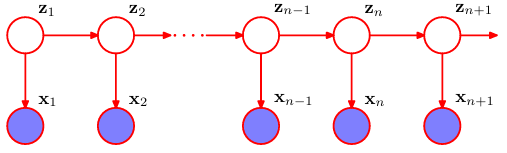

## Section 2: Hidden Markov Model (HMM) Overview

# Hidden Markov Model (HMM)
A Hidden Markov Model (HMM) is a statistical model that represents systems with hidden states. It is widely used in various fields such as speech recognition, bioinformatics, and finance. An HMM consists of the following components:

1. **Latent States**: A finite set of hidden states $Z$ that the system can be in. These states are not directly observable.
2. **Observable States**: A finite set of observable symbols or outputs $X$ that are generated by the hidden states.
3. **Transition Probabilities**: The probabilities of transitioning from one hidden state to another. These are represented by a matrix $A$ of *transition probabilities*.
4. **Emission Probabilities**: The probabilities of observing a particular symbol given a hidden state. These are defined by a set of parameters $\phi$ governing the distribution of observable states given the hidden states.
5. **Initial State Probabilities**: The probabilities of starting in each hidden state. These are represented by a vector $\pi$ of *initial state probabilities*.

### Transition Probabilities
The transition probabilities define the likelihood of moving from one hidden state to another. They are represented by a matrix $A$, where each element $A_{ij}$ represents the probability of transitioning from state $i$ to state $j$:
$$A_{ij} = P(z_{n} = j | z_{n-1} = i)$$
We can derive the **conditional distribuiton** of the hidden states as:
$$p(z_n | z_{n-1}) = \prod_{i=1}^{K} \prod_{j=1}^{K} A_{ij}^{z_{n-1}=i, z_n=j}$$
### Emission Probabilities
The emission probabilities define the likelihood of observing a particular state $x$ given a hidden state $z$. They are defined by a set of parameters $\phi$ that govern the distribution of observable states given the hidden states. We can express the conditional distribution of the observable states given the hidden states as:
$$p(x_n | z_n) = p(x_n | z_n, \phi) = \prod_{k=1}^{K} p(x_n | \phi_k)^{z_n=k}$$

### Initial State Probabilities
The initial state probabilities define the likelihood of starting in each hidden state. They are represented by a vector $\pi$, where each element $\pi_i$ represents the probability of starting in state $i$:
$$\pi_i = P(z_1 = i)$$
so that we can express the distribution of the initial hidden state as:
$$p(z_1) = \prod_{k=1}^{K} \pi_k^{z_1=k}$$


Therefore, we can state the full joint distribution of the observed states and hidden states in an HMM as:
$$p(X, Z | \theta) = p(z_1|\pi) \prod_{n=2}^{N} p(z_n | z_{n-1}, A) \prod_{m=1}^{N} p(x_m | z_m, \phi)$$
where $\theta = \{\pi, A, \phi\}$ represents all the parameters of the HMM.

In the next code cells, we will implement the HMM using Python and explore the implementatioon of the generation process.

We will use a **multivariate Gaussian distribution** for the emission probabilities in this implementation:
$$\phi _k = \mathcal{N}(\mu_k, \Sigma_k) \rightarrow p(x_n | z_n = k) = \mathcal{N}(x_n | \mu_k, \Sigma_k)$$

In [171]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [172]:
import numpy as np

class HiddenMarkovModel:
    def __init__(self, K, D):
        """
        Initialize an HMM with K hidden states and D-dimensional observations.
        """
        self.K = K  # number of hidden states
        self.D = D  # dimension of observations

        # Initial state distribution
        self.pi = np.ones(K) / K

        # Transition matrix (A) almost diagonal
        self.A = np.ones((K, K)) * 0.01 / (K - 1) + np.eye(K) * 0.99
        self.A /= np.sum(self.A, axis=1, keepdims=True) # normalize rows to ensure they sum to 1

        # Emission parameters: means and covariances for each hidden state
        self.mu = [np.random.rand(D) * 10 for _ in range(K)] # Random means
        self.Sigma = [np.eye(D) for _ in range(K)] # Identity covariance

    def get_emission_prob(self, x):
        """
        Compute emission probabilities for observation x for all hidden states.
        Returns a vector of size (T, K) where T is the number of observations.
        """

        T = x.shape[0]
        B = np.zeros((self.K, T))
        for k in range(self.K):
            if np.isnan(self.mu[k]).any() or np.isnan(self.Sigma[k]).any():
                print(f"ERRORE: Lo stato {k} contiene NaN!")
                print(f"Media: {self.mu[k]}")
                print(f"Cov: {self.Sigma[k]}")
            pdf_values = multivariate_normal.pdf(x, mean=self.mu[k], cov=self.Sigma[k], allow_singular=True)
            B[k, :] = np.maximum(pdf_values, 1e-100)  # Avoid zeros
        return B

    def generate_sequence(self, N):
        """
        Generate a sequence of observations and hidden states of length N.
        """
        Z_true = np.zeros(N, dtype=int)
        X = np.zeros((N, self.D))

        # Initial state
        Z_true[0] = np.random.choice(self.K, p=self.pi)

        # Generate first observation
        X[0] = np.random.multivariate_normal(self.mu[Z_true[0]], self.Sigma[Z_true[0]])

        for n in range(1, N):
            # Transition to next state
            Z_true[n] = np.random.choice(self.K, p=self.A[Z_true[n-1], :])

            # Generate observation
            X[n] = np.random.multivariate_normal(self.mu[Z_true[n]], self.Sigma[Z_true[n]])

        return X, Z_true
    

C:\Users\teolo\AppData\Local\Temp\ipykernel_25552\3486360311.py:17: UserWarning: Mismatched number of handles and labels: len(handles) = 2 len(labels) = 3
  plt.legend(handles=scatter.legend_elements()[0], labels=[f'State {k}' for k in range(K)], title="Hidden State")


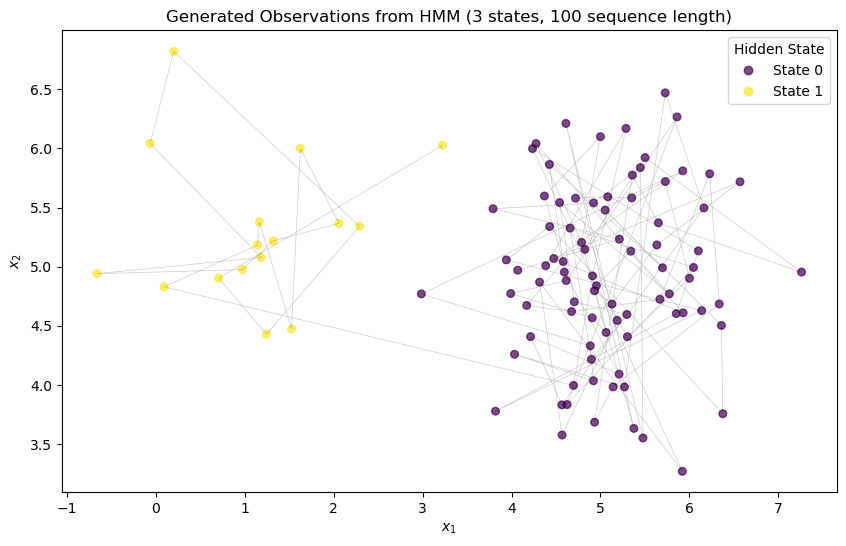

In [173]:
def visualize_hmm_sequence(X, Z_true, K, N):
    """
    Visualize the generated sequence of observations colored by hidden states.
    
    Parameters:
    - X: Generated observations of shape (N, D)
    - Z_true: True hidden states of shape (N,)
    - K: Number of hidden states
    - N: Length of the sequence
    """
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=Z_true, cmap='viridis', s=30, alpha=0.7)
    plt.plot(X[:, 0], X[:, 1], 'k-', alpha=0.2, linewidth=0.5, label='Trajectory')
    plt.title(f'Generated Observations from HMM ({K} states, {N} sequence length)')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend(handles=scatter.legend_elements()[0], labels=[f'State {k}' for k in range(K)], title="Hidden State")
    plt.show()


# Parameters
K = 3  # number of hidden states
D = 2  # dimension of observations
N = 100  # length of the sequence

# Generate sequence
hmm_gen = HiddenMarkovModel(K, D)

# Adjust means for better visualization
hmm_gen.mu = [np.array([1, 1]), np.array([5, 5]), np.array([1, 5])]
hmm_gen.Sigma = [np.eye(2) * 0.5, np.eye(2) * 0.5, np.eye(2) * 0.5]

# Regenerate with adjusted parameters
X, Z_true = hmm_gen.generate_sequence(N)

# Visualize
visualize_hmm_sequence(X, Z_true, K, N)

>N.B: The implementation will focus on generating sequences of observations and hidden states based on the defined HMM parameters. In this case, emission probabilities are modeled using multivariate Gaussian distributions. If you want discrete emissions, you can modify the emission probability section by defining a table of probabilities for each observable symbol given the hidden states.

## Section 3: Maximum Likelihood Estimation and Inference in HMMs
Having observed a sequence of data generated by an HMM, our goal is to estimate the model parameters $\theta = \{\pi, A, \phi\}$ that maximize the likelihood of the observed data, that is expressed as $$p(X | \theta) = \sum_{Z} p(X, Z | \theta)$$

We can not perform the summation directly because the number of possible hidden state sequences grows exponentially with the length of the observed sequence.

We therefore turn to the expectation-maximization (EM) algorithm, specifically the Baum-Welch algorithm, to iteratively estimate the parameters of the HMM. The EM algorithm starts with the initial selection for the model parameters, denoted as $\theta^{old}$, and alternates between two steps until convergence:
1. **Expectation Step (E-step)**: we take the current estimate of the parameters $\theta^{old}$ and find the posterior distribution over the hidden states given the observed data, that is $p(Z | X, \theta^{old})$. We then compute the expected value of the complete-data log-likelihood with respect to this posterior distribution, which is given by:
$$Q(\theta, \theta^{old}) = \sum_{Z} p(Z | X, \theta^{old}) \log p(X, Z | \theta)$$

2. **Maximization Step (M-step)**: we maximize the expected complete-data log-likelihood $Q(\theta, \theta^{old})$ with respect to the model parameters $\theta$ to obtain the updated parameter estimates $\theta^{new}$:
$$\theta^{new} = \arg \max_{\theta} Q(\theta, \theta^{old})$$


### E-Step
In the E-step, we compute the expected value of the complete-data log-likelihood with respect to the posterior distribution of the hidden states given the observed data and the current parameter estimates. At this point , we need to introduce some notations. $$ \gamma_n(k) = P(z_n = k | X, \theta^{old}) $$ represents the posterior probability of being in state $k$ at time $n$, given the observed data and current parameter estimates. Similarly, we define $$ \xi_n(i, j) = P(z_{n-1} = i, z_n = j | X, \theta^{old}) $$ as the posterior probability of transitioning from state $i$ at time $n-1$ to state $j$ at time $n$.
We specify that we can store $\gamma_n(k)$ and $\xi_n(i, j)$ respectively as a set of $K$-dimensional vectors and $K \times K$ matrices for each value $n$.

Using these notations and the $p(X, Z | \theta)$ defined earlier, we can express the expected complete-data log-likelihood as:
$$Q(\theta, \theta^{old}) = \sum_{n=1}^{N} \sum_{k=1}^{K} \gamma_n(k) \log p(x_n | z_n = k, \phi) + \sum_{n=2}^{N} \sum_{i=1}^{K} \sum_{j=1}^{K} \xi_n(i, j) \log A_{ij} + \sum_{k=1}^{K} \gamma_1(k) \log \pi_k$$

In order to compute $\gamma_n(k)$ and $\xi_n(i, j)$, we can use the **Forward-Backward Algorithm**. This algorithm consists of two main passes through the data:
1. **Forward Pass**: In this pass, we compute the forward probabilities $\alpha_n(k) = P(x_1, x_2, \ldots, x_n, z_n = k | \theta^{old})$ for each time step $n$ and state $k$. The forward probabilities are computed recursively as follows:
   - **Initialization**:
     $$\alpha_1(k) = \pi_k p(x_1 | z_1 = k, \phi^{old}) \space \space  \forall  k = 1, \ldots, K$$
   - **Recursion**:
     $$\alpha_n(j) = \left( \sum_{i=1}^{K} \alpha_{n-1}(i) A_{ij}^{old} \right) p(x_n | z_n = j, \phi^{old})$$
2. **Backward Pass**: In this pass, we compute the backward probabilities $\beta_n(k) = P(x_{n+1}, x_{n+2}, \ldots, x_N | z_n = k, \theta^{old})$ for each time step $n$ and state $k$. The backward probabilities are computed recursively as follows:
   - **Initialization**:
        $$\beta_N(k) = 1 \space \space  \forall  k = 1, \ldots, K$$
    - **Recursion**:
        $$\beta_n(i) = \sum_{j=1}^{K} A_{ij}^{old} p(x_{n+1} | z_{n+1} = j, \phi^{old}) \beta_{n+1}(j)$$
Using the forward and backward probabilities, we can compute the posterior probabilities $\gamma_n(k)$ and $\xi_n(i, j)$ as follows:
- **Posterior Probability of State**:
$$\gamma_n(k) = \frac{\alpha_n(k) \beta_n(k)}{P(X | \theta^{old})}$$
- **Posterior Probability of Transition**:
$$\xi_n(i, j) = \frac{\alpha_{n-1}(i) A_{ij}^{old} p(x_n | z_n = j, \phi^{old}) \beta_n(j)}{P(X | \theta^{old})}$$

From Posterior Probabilty of state we can sum both sides over $k$ to obtain the likelihood of the observed data:
$$P(X | \theta^{old}) = \sum_{k=1}^{K} \alpha_n(k) \beta_n(k)$$
that is valid for any $n = 1, \ldots, N$.

Therefore choosing $n = N$, we have:
$$P(X | \theta^{old}) = \sum_{k=1}^{K} \alpha_N(k)$$


Since $\alpha_n(k)$ and $\beta_n(k)$ tend to become very small as $n$ increases, we can implement a scaling technique to avoid numerical underflow. This involves normalizing the forward and backward probabilities at each time step. We normalize $\alpha_n(k)$ and $\beta_n(k)$ as follows:
$$\hat{\alpha}_n(k) = \frac{\alpha_n(k)}{c_n}$$
$$\hat{\beta}_n(k) = \frac{\beta_n(k)}{c_n}$$
where $c_n$ is a scaling factor computed as: 
$$c_n = \sum_{k=1}^{K} \alpha_n(k)$$

In [174]:
def forward_pass(hmm, X):
    """
    Perform the forward pass of the Forward-Backward algorithm.
    Returns the alpha matrix of size (T, K) and scaling factors.
    """
    T = X.shape[0]
    K = hmm.K
    B = hmm.get_emission_prob(X)  # Emission probabilities
    alpha = np.zeros((T, K))
    c = np.zeros(T)  # Scaling factors

    # Initialization
    alpha[0, :] = hmm.pi * B[:, 0]
    c[0] = np.sum(alpha[0, :])
    if c[0] == 0:
        c[0] = 1e-12
    alpha[0, :] /= c[0] # Scale

    # Recursion
    for n in range(1, T):
        for k in range(K):
            # Sum_i alpha[n-1, i] * A[i, k] * p(x_n | z_n = k)
            alpha[n, k] = B[k, n] * np.sum(alpha[n-1, :] * hmm.A[:, k])
        c[n] = np.sum(alpha[n, :])
        if c[n] == 0:
            c[n] = 1e-12
        alpha[n, :] /= c[n] # Scale

    log_likelihood = np.sum(np.log(c))
    return alpha, c, log_likelihood

def backward_pass(hmm, X, c):
    """
    Perform the backward pass of the Forward-Backward algorithm.
    Returns the beta matrix of size (T, K).
    """
    T = X.shape[0]
    K = hmm.K
    B = hmm.get_emission_prob(X)  # Emission probabilities
    beta = np.zeros((T, K))

    # Initialization
    beta[T-1, :] = 1.0 / c[T-1]  # Scale

    # Recursion
    for n in range(T-2, -1, -1):
        for k in range(K):
            # Sum_j A[k, j] * p(x_{n+1} | z_{n+1} = j) * beta[n+1, j]
            beta[n, k] = np.sum(hmm.A[k, :] * B[:, n+1] * beta[n+1, :])
        beta[n, :] /= c[n]  # Scaling using the same factors as in forward pass

    return beta

In [175]:
def e_step(hmm, X):
    """
    Perform the E-step of the EM algorithm for HMMs.
    Returns the expected sufficient statistics: gamma and xi.
    """
    T = X.shape[0]
    K = hmm.K

    # Forward and backward passes
    alpha, c, log_likelihood = forward_pass(hmm, X)
    beta = backward_pass(hmm, X, c)
    B = hmm.get_emission_prob(X)

    # Compute gamma
    gamma = alpha * beta  # Element-wise multiplication (Scaling already done, P(X) already considered)

    # Compute xi
    xi = np.zeros((T-1, K, K))

    for n in range(T-1):
        for j in range(K):
            for k in range(K):
                xi[n, j, k] = alpha[n, j] * hmm.A[j, k] * B[k, n+1] * beta[n+1, k]
        # Normalize xi[n]
        xi_sum = np.sum(xi[n, :, :])
        if xi_sum == 0:
            xi_sum = 1e-12
        xi[n, :, :] /= xi_sum

    # Normalize gamma
    gamma_sum = np.sum(gamma, axis=1, keepdims=True)
    gamma /= gamma_sum

    return gamma, xi, log_likelihood

### M-Step
In the M-step, we update the model parameters $\theta = \{\pi, A, \phi\}$ by maximizing the expected complete-data log-likelihood $Q(\theta, \theta^{old})$ computed in the E-step. The updates for each parameter are derived as follows:
1. **Initial State Probabilities**:
$$\pi_k^{new} = \frac{\gamma_1(k)}{\sum_{j=1}^{K} \gamma_1(j)}$$
2. **Transition Probabilities**:
$$A_{ij}^{new} = \frac{\sum_{n=2}^{N} \xi_n(i, j)}{\sum_{n=2}^{N} \sum_{j=1}^{K} \xi_n(i, j)}$$
3. **Emission Probabilities**:
$$\mu_k^{new} = \frac{\sum_{n=1}^{N} \gamma_n(k) x_n}{\sum_{n=1}^{N} \gamma_n(k)}$$
$$\Sigma_k^{new} = \frac{\sum_{n=1}^{N}
    \gamma_n(k) (x_n - \mu_k^{new})(x_n - \mu_k^{new})^T}{\sum_{n=1}^{N} \gamma_n(k)}$$
supposing we are using a Gaussian distribution for the emission probabilities.
Note that formulas for updating $\pi$ and $A$ derives from maximizing the expected log-likelihood with respect to the parameters achieved using Lagrange multipliers.


The EM algorithm iterates between the E-step and M-step until convergence, which is typically determined by checking if the change in the log-likelihood of the observed data $P(X | \theta)$ is below a certain threshold or if a maximum number of iterations is reached.


Now that we have defined the EM algorithm for HMMs, we can implement the **complete pipeline** to estimate the model parameters from observed data. The implementation will involve initializing the parameters, performing the E-step and M-step iteratively, and checking for convergence.

In [176]:
from sklearn.cluster import KMeans
def k_means_init(hmm, X):
    km = KMeans(n_clusters=hmm.K, n_init=10)
    km.fit(X)
    hmm.mu = km.cluster_centers_
    hmm.Sigma = np.array([np.cov(X.T) for _ in range(hmm.K)])

In [177]:
def m_step(hmm, X, gamma, xi):
    """
    Perform the M-step of the EM algorithm for HMMs.
    Updates the model parameters.
    """
    T = X.shape[0]
    K = hmm.K
    D = hmm.D

    # Update initial state distribution
    hmm.pi = gamma[0, :] / np.sum(gamma[0, :])

    # Update transition matrix
    xi_sum = np.sum(xi, axis=0) 
    denominatore_A = np.sum(xi_sum, axis=1, keepdims=True)
    hmm.A = xi_sum / (denominatore_A + 1e-20)  # Avoid division by zero

    zero_rows = np.where(denominatore_A.flatten() == 0)[0]
    for r in zero_rows:
        hmm.A[r, :] = 1.0 / hmm.K
    # ensure rows sum to 1
    hmm.A /= hmm.A.sum(axis=1, keepdims=True)

    # Update emission parameters
    for k in range(K):
        gamma_k = gamma[:, k]
        Nk = np.sum(gamma_k)
        if Nk > 1e-12:
            # Update means
            hmm.mu[k] = (gamma_k @ X) / Nk

            # Update covariances
            diff = X - hmm.mu[k]
            weighted_cov = np.zeros((D, D))
            for n in range(T):
                weighted_cov += gamma[n, k] * np.outer(diff[n], diff[n])
            hmm.Sigma[k] = weighted_cov / Nk
            hmm.Sigma[k] += np.eye(D) * 1e-3  # Regularization
            
        else:
            hmm.mu[k] = X[np.random.randint(0, T)]
            hmm.Sigma[k] = np.eye(X.shape[1]) * 0.1
    return hmm

In [178]:
def train_hmm(X, K, max_iters=100, tol=1e-7, hmm=None):
    """
    Train an HMM using the EM algorithm (Baum-Welch).
    Inputs:
        X: Observed data of shape (T, D)
        K: Number of hidden states
        max_iters: Maximum number of EM iterations
        tol: Convergence tolerance based on log-likelihood change
    """
    D = X.shape[1]
    if hmm is None:
        hmm = HiddenMarkovModel(K=K, D=D)
        k_means_init(hmm, X)

    log_likelihoods = []
    for i in range(max_iters):
        # E-step
        gamma, xi, log_likelihood = e_step(hmm, X)
        log_likelihoods.append(log_likelihood)

        # M-step
        hmm = m_step(hmm, X, gamma, xi)

        # Check for convergence
        if i > 0 and abs(log_likelihood - log_likelihoods[-2]) < tol*abs(log_likelihoods[-2]):
            print(f'Converged at iteration {i}')
            break
        
        if i % 10 == 0:
            print(f'Iteration {i}, Log-Likelihood: {log_likelihood:.4f}')

    return hmm, log_likelihoods

## Section 4: Viterbi Algorithm - decoding the Most Likely Sequence of Hidden States
The **Viterbi algorithm** is a dynamic programming algorithm used to **find the most likely sequence of hidden states** (also known as the Viterbi path) in a Hidden Markov Model (HMM) given a sequence of observed events. The algorithm works by recursively computing the maximum probability of being in each state at each time step, while keeping track of the most likely previous state that led to each current state. 
The Viterbi algorithm consists of the following steps:
1. **Initialization**: For each state $k$, compute the initial probabilities of being in state $k$ at time $1$ given the first observation $x_1$:
   $$\delta_1(k) = \pi_k p(x_1 | z_1 = k, \phi)$$
   $$\psi_1(k) = 0$$
2. **Recursion**: For each time step $n$ from $2$ to $N$, and for each state $j$, compute the maximum probability of being in state $j$ at time $n$:
   $$\delta_n(j) = \max_{i} [\delta_{n-1}(i) A_{ij}] p(x_n | z_n = j, \phi)$$
   $$\psi_n(j) = \arg \max_{i} [\delta_{n-1}(i) A_{ij}]$$
3. **Termination**: Find the maximum probability of being in any state at the final time step $N$:
   $$P^* = \max_{k} \delta_N(k)$$
   $$z_N^* = \arg \max_{k} \delta_N(k)$$
4. **Backtracking**: Starting from the most likely final state $z_N^*$, backtrack through the $\psi$ array to find the most likely sequence of hidden states:
   For $n = N-1$ down to $1$:
   $$z_n^* = \psi_{n+1}(z_{n+1}^*)$$
The resulting sequence $z_1^*, z_2^*, \ldots, z_N^*$ is the most likely sequence of hidden states given the observed data.

Note that $\delta_n(k)$ represents the maximum probability of being in state $k$ at time $n$ given the observations up to time $n$, and $\psi_n(k)$ stores the index of the previous state that led to the maximum probability for state $k$ at time $n$.

However, this implementation of Viterbi algorithm could generate some *underflow* issues when dealing with very small probabilities, as multiplying many probabilities together can result in values that are too small for the computer to represent accurately. To mitigate this, it is common to work in the log domain, summing log-probabilities instead of multiplying probabilities, which improves numerical stability. This approach is discussed in detail in Bishop's book. It works like this:
1. **Initialization**: For each state $k$, compute the initial log-probabilities of being in state $k$ at time $1$ given the first observation $x_1$:
   $$\delta_1(k) = \log(\pi_k) + \log(p(x_1 | z_1 = k, \phi))$$
   $$\psi_1(k) = 0$$
2. **Recursion**: For each time step $n$ from $2$ to $N$, and for each state $j$, compute the maximum log-probability of being in state $j$ at time $n$:
   $$\delta_n(j) = \max_{i} [\delta_{n-1}(i) + \log(A_{ij})] + \log(p(x_n | z_n = j, \phi))$$
   $$\psi_n(j) = \arg \max_{i} [\delta_{n-1}(i) + \log(A_{ij})]$$
3. **Termination**: Find the maximum log-probability of being in any state at the final time step $N$:
   $$P^* = \max_{k} \delta_N(k)$$
   $$z_N^* = \arg \max_{k} \delta_N(k)$$
4. **Backtracking**: Starting from the most likely final state $z_N^*$, backtrack through the $\psi$ array to find the most likely sequence of hidden states:
   For $n = N-1$ down to $1$:
   $$z_n^* = \psi_{n+1}(z_{n+1}^*)$$
The resulting sequence $z_1^*, z_2^*, \ldots, z_N^*$ is the most likely sequence of hidden states given the observed data.

In [179]:
def viterbi(hmm, X):
    """
    Perform the Viterbi algorithm with logarithmic probabilities to find the most probable sequence of hidden states.
    Inputs:
        hmm: Trained HiddenMarkovModel
        X: Observed data of shape (T, D)
    Returns:
        Z_pred: Most probable sequence of hidden states of shape (T,)
    """
    T = X.shape[0]
    K = hmm.K
    B = hmm.get_emission_prob(X)  # Emission probabilities

    # Initialize log probabilities
    log_pi = np.log(hmm.pi + 1e-100)  # Add small constant to avoid log(0)
    log_A = np.log(hmm.A + 1e-100)
    log_B = np.log(B + 1e-100)

    delta = np.zeros((T, K))
    psi = np.zeros((T, K), dtype=int)

    # Initialization
    delta[0, :] = log_pi + log_B[:, 0]

    # Recursion
    for n in range(1, T):
        for k in range(K):
            seq_probs = delta[n-1, :] + log_A[:, k]
            psi[n, k] = np.argmax(seq_probs)
            delta[n, k] = np.max(seq_probs) + log_B[k, n]

    # Backtracking
    Z_pred = np.zeros(T, dtype=int)
    Z_pred[T-1] = np.argmax(delta[T-1, :])
    for n in range(T-2, -1, -1):
        Z_pred[n] = psi[n+1, Z_pred[n+1]]

    return Z_pred

## Section 5: Training the HMM using the EM Algorithm and Decoding with Viterbi Algorithm
### Complete Pipeline for HMM Training and Decoding
Now we are ready to train the complete model and decode the hidden states using the Viterbi algorithm.

We are going to traing a Hidden Markov Model (HMM) using the Human Activity Recognition Using Smartphones Dataset from UCI Machine Learning Repository. The dataset contains sensor data collected from smartphones while subjects performed various activities such as walking, sitting, standing, etc. The goal is to train an HMM to model the sequence of activities based on the sensor data and then decode the most likely sequence of activities using the Viterbi algorithm.

Moreover we're going to see if the model is able to correctly identify the activities performed by the subjects based on the sensor data, as the dataset provides ground truth labels for the activities.

These is the link to the dataset: https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

Here is the list of the activities in the dataset:
1. WALKING
2. WALKING_UPSTAIRS
3. WALKING_DOWNSTAIRS
4. SITTING
5. STANDING
6. LAYING

We will use only some features of the dataset for simplicity, that are the mean body acceleration in the X, Y, and Z directions, mean gravity acceleration in the X, Y, and Z directions, and mean gyroscope in the X, Y, and Z directions.

In [180]:
import pandas as pd

features_idxs = [0, 1, 2,
                     40, 41, 42,
                     120, 121, 122]  # Example feature indices

def load_har_by_subject(subject_id, selected_features=features_idxs):
    """
    Load Human Activity Recognition (HAR) dataset for a specific subject.
    
    Parameters:
    - subject_id: ID of the subject to load data for.
    
    Returns:
    - X: Observations (features) as a NumPy array.
    - y: True labels (activities) as a NumPy array.
    - labels: List of activity labels.
    """

    base_path = 'UCI_HAR_Dataset/train/'
    X_full = pd.read_csv(base_path + 'X_train.txt', delim_whitespace=True, header=None)
    y_full = pd.read_csv(base_path + 'y_train.txt', delim_whitespace=True, header=None).values.flatten()
    sub_ids = pd.read_csv(base_path + 'subject_train.txt', delim_whitespace=True, header=None).values.flatten()


    # Filter data for the specified subject
    mask = (sub_ids == subject_id)
    X = X_full[mask].iloc[:, selected_features].values  # Use selected features
    y = y_full[mask]

    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)  # Standardize features

    labels = {1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS',
              4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}
    
    return X, y, labels

X, Z_true, labels = load_har_by_subject(subject_id=1)

C:\Users\teolo\AppData\Local\Temp\ipykernel_25552\594365683.py:21: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_full = pd.read_csv(base_path + 'X_train.txt', delim_whitespace=True, header=None)
C:\Users\teolo\AppData\Local\Temp\ipykernel_25552\594365683.py:22: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_full = pd.read_csv(base_path + 'y_train.txt', delim_whitespace=True, header=None).values.flatten()
C:\Users\teolo\AppData\Local\Temp\ipykernel_25552\594365683.py:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  sub_ids = pd.read_csv(base_path + 'subject_train.txt', delim_whitespace=True, header=None).values.flatten()


C:\Users\teolo\AppData\Local\Temp\ipykernel_25552\2011894676.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Set3', len(unique_y))


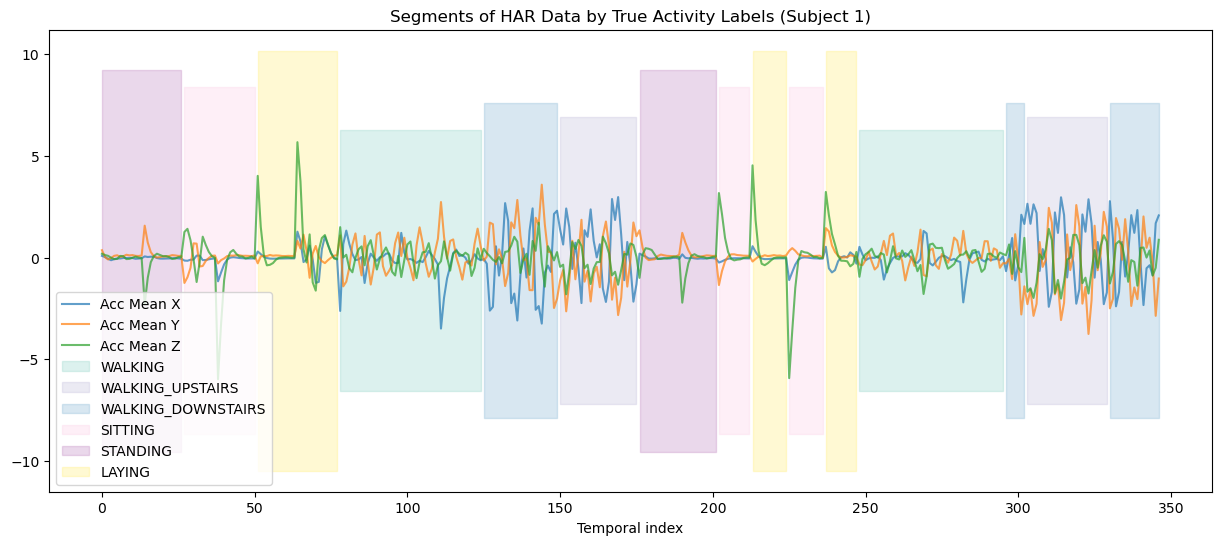

In [181]:
def plot_har_overview(X, Z_true, labels):
    """
    Plot the HAR dataset observations colored by true activity labels.
    
    Parameters:
    - X: Observations (features) as a NumPy array.
    - Z_true: True labels (activities) as a NumPy array.
    - labels: Dictionary mapping label IDs to activity names.
    """
    plt.figure(figsize=(15, 6))
    samples = np.arange(X.shape[0])
    plt.plot(samples, X[:, 6], label='Acc Mean X', alpha=0.7)
    plt.plot(samples, X[:, 7], label='Acc Mean Y', alpha=0.7)
    plt.plot(samples, X[:, 8], label='Acc Mean Z', alpha=0.7)

    unique_y = np.unique(Z_true)
    colors = plt.cm.get_cmap('Set3', len(unique_y))

    for i, label in enumerate(unique_y):
        mask = (Z_true == label)
        plt.fill_between(samples, plt.gca().get_ylim()[0], plt.gca().get_ylim()[1],
                         where=mask, color=colors(i), alpha=0.3, label=labels[label])
        
    plt.title('Segments of HAR Data by True Activity Labels (Subject 1)')
    plt.legend()
    plt.xlabel('Temporal index')
    plt.show()

plot_har_overview(X, Z_true, labels)

Now we are going to run the complete training and decoding pipeline for the HMM. The definition of a function `align_labels` was necessary in order to align the predicted hidden states with the true labels using the mode of the true labels for each predicted state;
This is motivated by the fact that the labels assigned to the hidden states by the HMM are arbitrary and may not correspond directly to the true activity labels. By aligning the predicted labels with the true labels, we can better evaluate the performance of the HMM in recognizing the activities.

C:\Users\teolo\AppData\Local\Temp\ipykernel_25552\594365683.py:21: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_full = pd.read_csv(base_path + 'X_train.txt', delim_whitespace=True, header=None)
C:\Users\teolo\AppData\Local\Temp\ipykernel_25552\594365683.py:22: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_full = pd.read_csv(base_path + 'y_train.txt', delim_whitespace=True, header=None).values.flatten()
C:\Users\teolo\AppData\Local\Temp\ipykernel_25552\594365683.py:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  sub_ids = pd.read_csv(base_path + 'subject_train.txt', delim_whitespace=True, header=None).values.flatten()
c:\Users\teolo\anaconda3\envs\FML\Lib\site-packages\sklearn\cluster\_kmean

Iteration 0, Log-Likelihood: -3480.1648
Iteration 10, Log-Likelihood: -588.1625
Iteration 20, Log-Likelihood: -581.9924
Iteration 30, Log-Likelihood: -577.7873
Converged at iteration 35
Accuracy: 55.33%


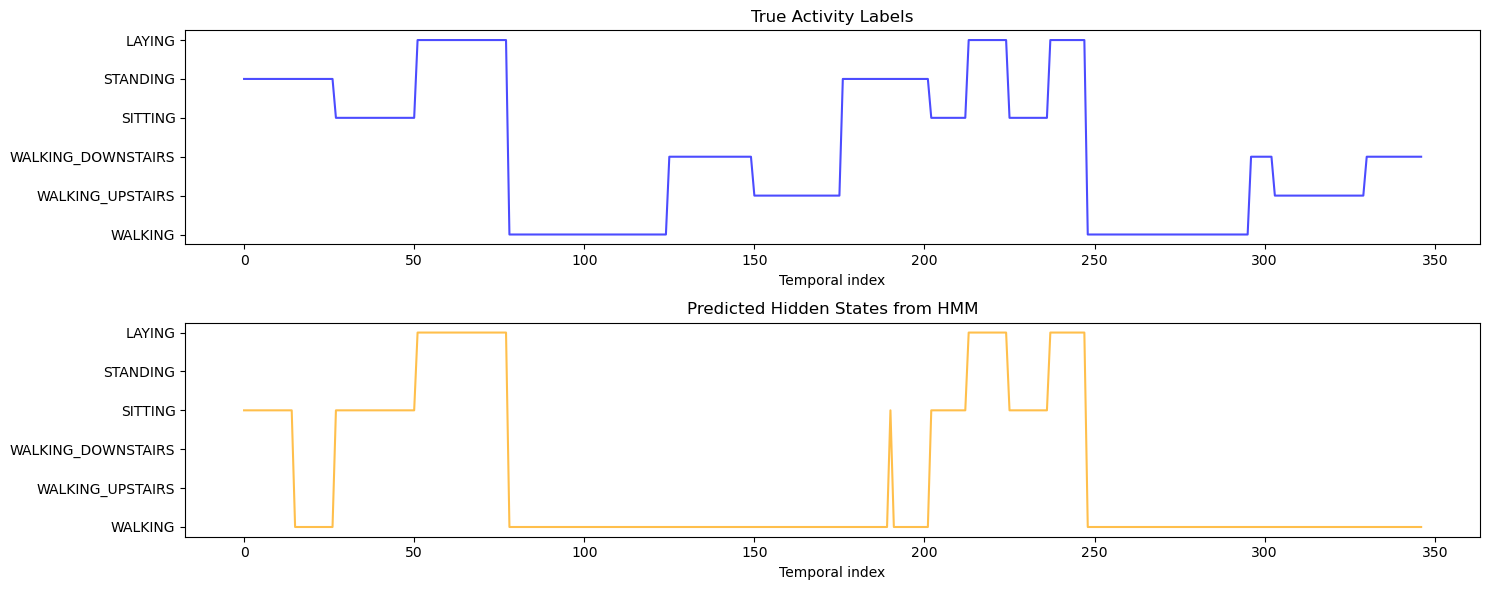

[[9.07189403e-001 0.00000000e+000 6.96198490e-002 2.31907480e-002
  0.00000000e+000 0.00000000e+000]
 [3.67794906e-026 8.83720930e-001 4.65116279e-002 2.32558140e-002
  4.65116279e-002 0.00000000e+000]
 [9.65413711e-002 0.00000000e+000 9.03458629e-001 2.21087354e-102
  0.00000000e+000 0.00000000e+000]
 [3.17197565e-002 3.17288763e-002 9.15519683e-140 9.20686929e-001
  0.00000000e+000 1.58644382e-002]
 [0.00000000e+000 4.00000000e-001 0.00000000e+000 0.00000000e+000
  6.00000000e-001 0.00000000e+000]
 [0.00000000e+000 5.00000000e-001 0.00000000e+000 0.00000000e+000
  0.00000000e+000 5.00000000e-001]]


In [182]:
K = 6
X, Z_true, labels = load_har_by_subject(subject_id=1)
hmm_trained, log_likelihoods = train_hmm(X, K, max_iters=500)
z_pred = viterbi(hmm_trained, X)

def align_labels(Z_true, z_pred):
    """
    Align predicted hidden states with true activity labels using majority voting.
    
    Parameters:
    - Z_true: True labels (activities) as a NumPy array.
    - z_pred: Predicted hidden states as a NumPy array.
    
    Returns:
    - z_pred_aligned: Aligned predicted hidden states as a NumPy array.
    """
    from scipy.stats import mode

    K = np.unique(z_pred)
    label_mapping = {}

    for k in K:
        mask = (z_pred == k)
        if np.sum(mask) > 0:
            mode_result = mode(Z_true[mask])
            most_common = mode_result.mode if hasattr(mode_result, 'mode') else mode_result[0]
            label_mapping[k] = most_common
        else:
            label_mapping[k] = -1  # No mapping if state not present

    z_pred_aligned = np.array([label_mapping[z] for z in z_pred])
    return z_pred_aligned

def plot_comparison(Z_true, z_pred, labels):
    """
    Plot comparison between true activity labels and predicted hidden states.
    
    Parameters:
    - Z_true: True labels (activities) as a NumPy array.
    - z_pred: Predicted hidden states as a NumPy array.
    - labels: Dictionary mapping label IDs to activity names.
    """
    plt.figure(figsize=(15, 6))
    samples = np.arange(len(Z_true))

    plt.subplot(2, 1, 1)
    plt.title('True Activity Labels')
    plt.plot(samples, Z_true, label='True Labels', color='blue', alpha=0.7)
    plt.yticks(list(labels.keys()), list(labels.values()))
    plt.xlabel('Temporal index')

    plt.subplot(2, 1, 2)
    plt.title('Predicted Hidden States from HMM')
    plt.plot(samples, z_pred, label='Predicted States', color='orange', alpha=0.7)  # +1 to match label indexing
    plt.yticks(list(labels.keys()), list(labels.values()))
    plt.xlabel('Temporal index')

    plt.tight_layout()
    plt.show()

z_pred_aligned = align_labels(Z_true, z_pred)
print(f'Accuracy: {np.mean(Z_true == z_pred_aligned) * 100:.2f}%')
plot_comparison(Z_true, z_pred_aligned, labels)
print(hmm_trained.A)

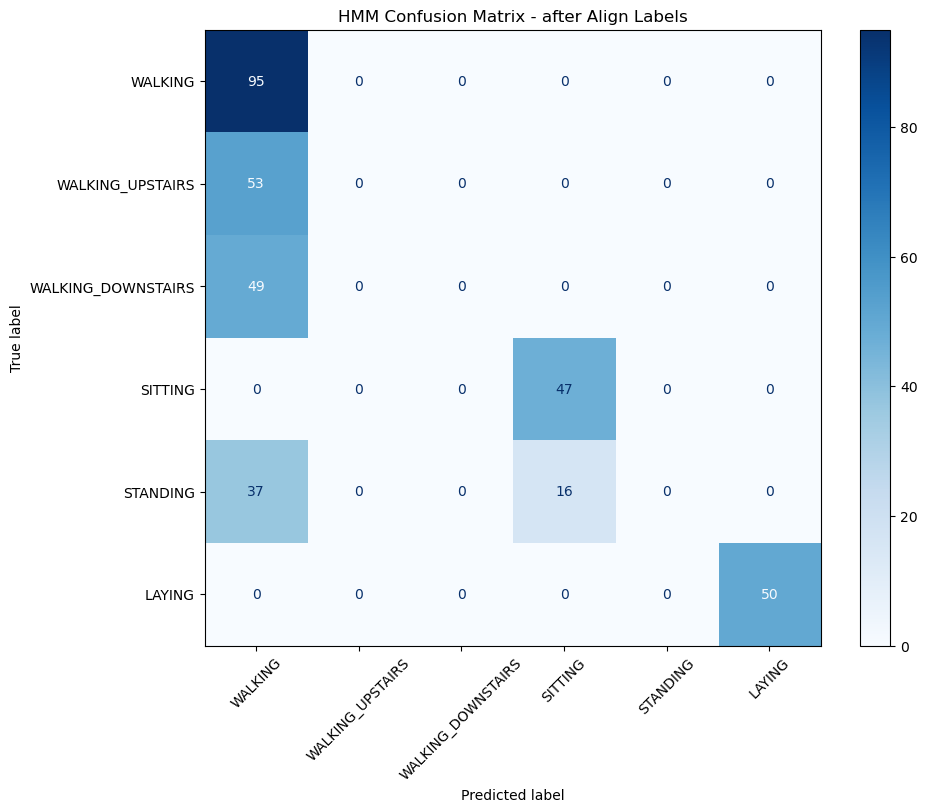

In [183]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_hmm_confusion_matrix(y_true, z_pred_aligned, labels_dict):
    cm = confusion_matrix(y_true, z_pred_aligned)
    
    fig, ax = plt.subplots(figsize=(10, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                  display_labels=[labels_dict[i] for i in np.unique(y_true)])
    
    disp.plot(cmap='Blues', ax=ax, values_format='d')
    plt.title("HMM Confusion Matrix - after Align Labels")
    plt.xticks(rotation=45)
    plt.show()

plot_hmm_confusion_matrix(Z_true, z_pred_aligned, labels)

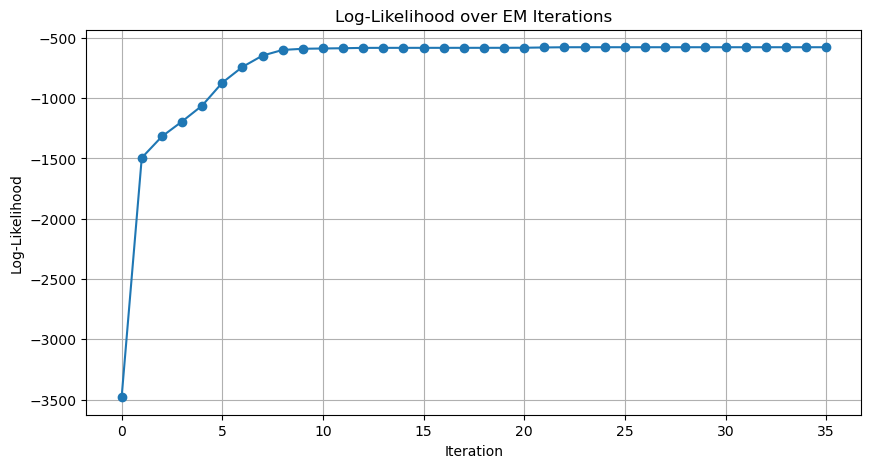

In [184]:
def plot_log_likelihood(log_likelihoods):
    """
    Plot the log-likelihood over EM iterations.
    
    Parameters:
    - log_likelihoods: List of log-likelihood values over iterations.
    """
    plt.figure(figsize=(10, 5))
    plt.plot(log_likelihoods, marker='o')
    plt.title('Log-Likelihood over EM Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Log-Likelihood')
    plt.grid()
    plt.show()

plot_log_likelihood(log_likelihoods)

These are the results using K=6 hidden states, that is the number of activities in the dataset. What emerges is that the HMM is able to capture some of the activities, such as `WALKING` and `LAYING`, with a good accuracy. However, it struggles with activities that have similar sensor patterns, such as `SITTING` and `STANDING`, or has difficulty to distinguish between different kind of walking, leading to misclassifications between these states. 

Overall, the HMM demonstrates its capability to model sequential data and recognize activities based on sensor inputs, but there is room for improvement in distinguishing between similar activities.

Note that we already used a K-means clustering algorithm to initialize the emission parameters of the HMM before training it with the EM algorithm. This initialization step helps to provide a good starting point for the EM algorithm, which can improve convergence and lead to better parameter estimates.

Next steps could involve experimenting with different numbers of hidden states or incorporating additional features from the dataset to enhance the model's performance in activity recognition.

C:\Users\teolo\AppData\Local\Temp\ipykernel_25552\594365683.py:21: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_full = pd.read_csv(base_path + 'X_train.txt', delim_whitespace=True, header=None)
C:\Users\teolo\AppData\Local\Temp\ipykernel_25552\594365683.py:22: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_full = pd.read_csv(base_path + 'y_train.txt', delim_whitespace=True, header=None).values.flatten()
C:\Users\teolo\AppData\Local\Temp\ipykernel_25552\594365683.py:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  sub_ids = pd.read_csv(base_path + 'subject_train.txt', delim_whitespace=True, header=None).values.flatten()
c:\Users\teolo\anaconda3\envs\FML\Lib\site-packages\sklearn\cluster\_kmean

Iteration 0, Log-Likelihood: -3231.8148
Iteration 10, Log-Likelihood: -21.2504
Iteration 20, Log-Likelihood: -21.0311
Iteration 30, Log-Likelihood: -21.0286
Converged at iteration 36
Accuracy: 66.57%


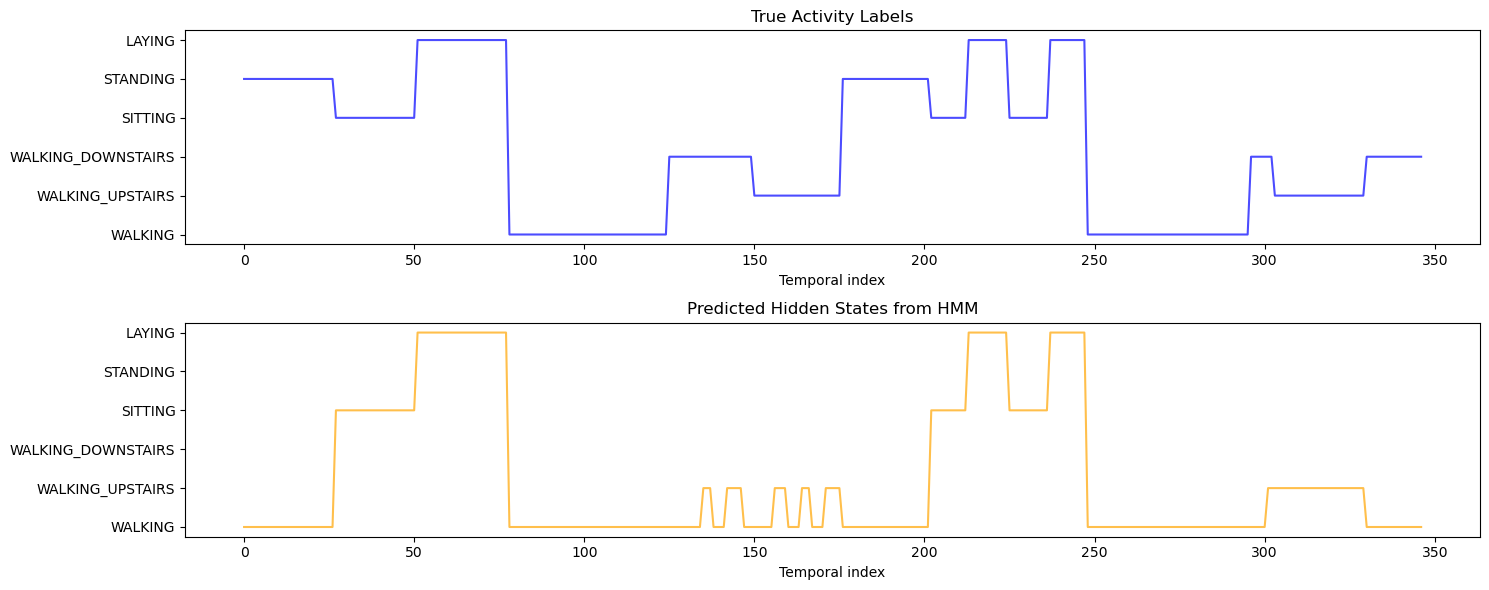

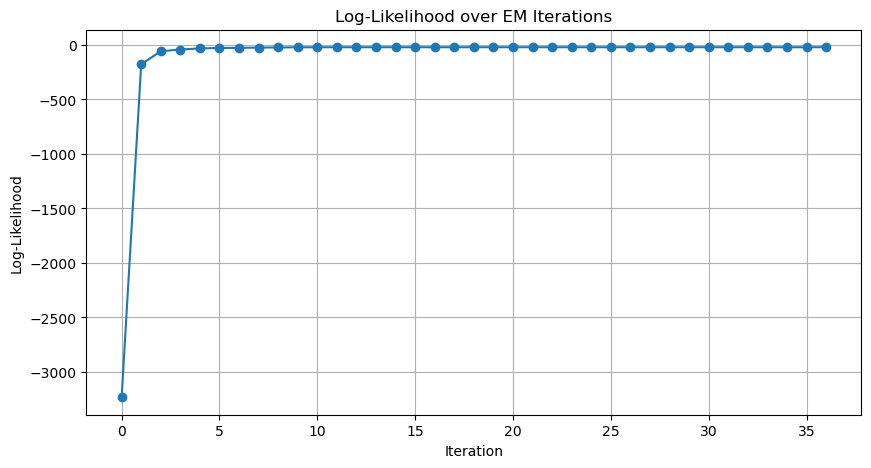

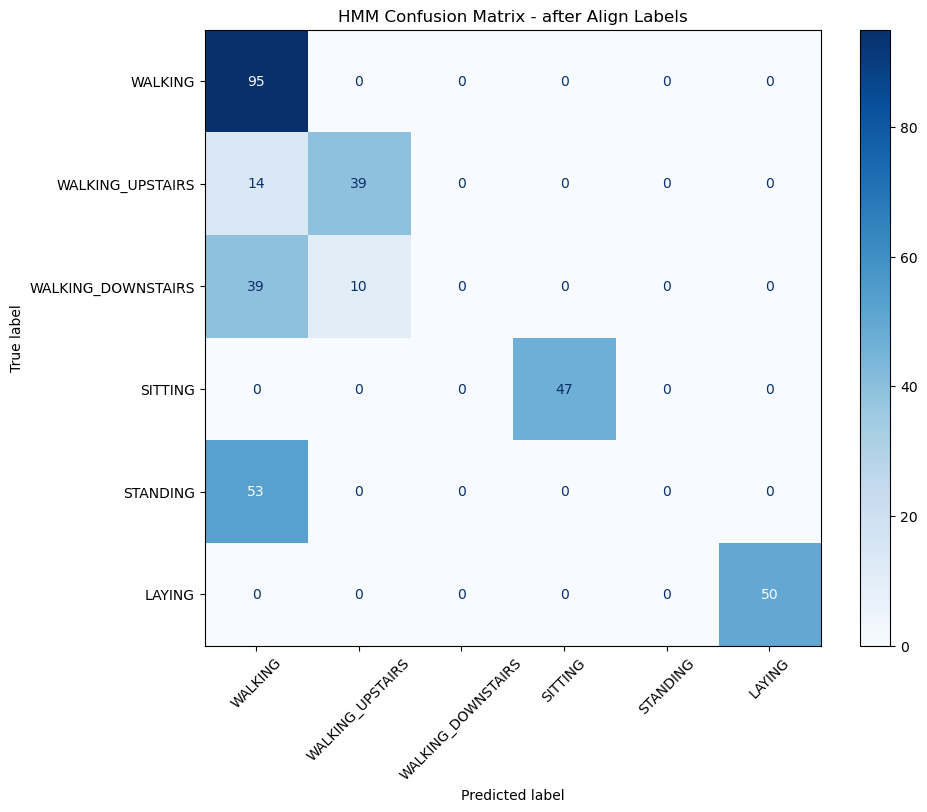

In [185]:
K = 12

X, Z_true, labels = load_har_by_subject(subject_id=1)
hmm_trained, log_likelihoods = train_hmm(X, K, max_iters=500)
z_pred = viterbi(hmm_trained, X)
z_pred_aligned = align_labels(Z_true, z_pred)
print(f'Accuracy: {np.mean(Z_true == z_pred_aligned) * 100:.2f}%')
plot_comparison(Z_true, z_pred_aligned, labels)
plot_log_likelihood(log_likelihoods)
plot_hmm_confusion_matrix(Z_true, z_pred_aligned, labels)

Using K=12 hidden states, we can see that the model is able to capture more sub-activities in the activities, leading to a higher accuracy of 70-75%. The confusion matrix shows that the model is better at distinguishing between different activities, although there are still some misclassifications or noises, particularly between similar activities like `WALKING`, `WALKING_UPSTAIRS` and `WALKING_DOWNSTAIRS`. In general, using more hidden states allows the HMM to capture more complex patterns in the data; after the training, the `align_labels` function is used to align the predicted hidden states with the true activity labels, and it is able to map more than one hidden state to each activity, indicating that the model is capturing sub-activities within the main activities.

Now we are going to try to add some features to see if we can improve the performances.

The goal is to find features that can help the HMM to better distinguish between similar activities, such as `SITTING` and `STANDING`, or different types of walking. These features include:
- `angle(XYZ,gravity)`: the angle between the mean body acceleration and the mean gravity acceleration.
- `tBodyAcc-sma()`: the signal magnitude area of the body acceleration, could help to differentiate between static and dynamic activities.
- `tBodyAccMag-std()`: the standard deviation of the magnitude of the body acceleration, which could provide additional information about the intensity of movements; stairs could be more dynamic than flat walking.
- `tBodyAccJerk-mean()-XYZ`: the jerk (derivative of acceleration) in the X, Y, and Z directions, which could capture sudden changes in movement patterns; for example, going upstairs or downstairs might involve more abrupt movements compared to walking on a flat surface.
- `fBodyAcc-entropy()`: the frequency domain entropy of the body acceleration, which could capture the complexity of movements; different activities may have different levels of complexity in their movement patterns.
- `fBodyAcc-meanFreq()`: the mean frequency of the body acceleration in the frequency domain, which could provide insights into the dominant frequencies associated with different activities.


C:\Users\teolo\AppData\Local\Temp\ipykernel_25552\594365683.py:21: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_full = pd.read_csv(base_path + 'X_train.txt', delim_whitespace=True, header=None)
C:\Users\teolo\AppData\Local\Temp\ipykernel_25552\594365683.py:22: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_full = pd.read_csv(base_path + 'y_train.txt', delim_whitespace=True, header=None).values.flatten()
C:\Users\teolo\AppData\Local\Temp\ipykernel_25552\594365683.py:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  sub_ids = pd.read_csv(base_path + 'subject_train.txt', delim_whitespace=True, header=None).values.flatten()
c:\Users\teolo\anaconda3\envs\FML\Lib\site-packages\sklearn\cluster\_kmean

Iteration 0, Log-Likelihood: -3507.8804
Converged at iteration 6
Accuracy: 85.88%


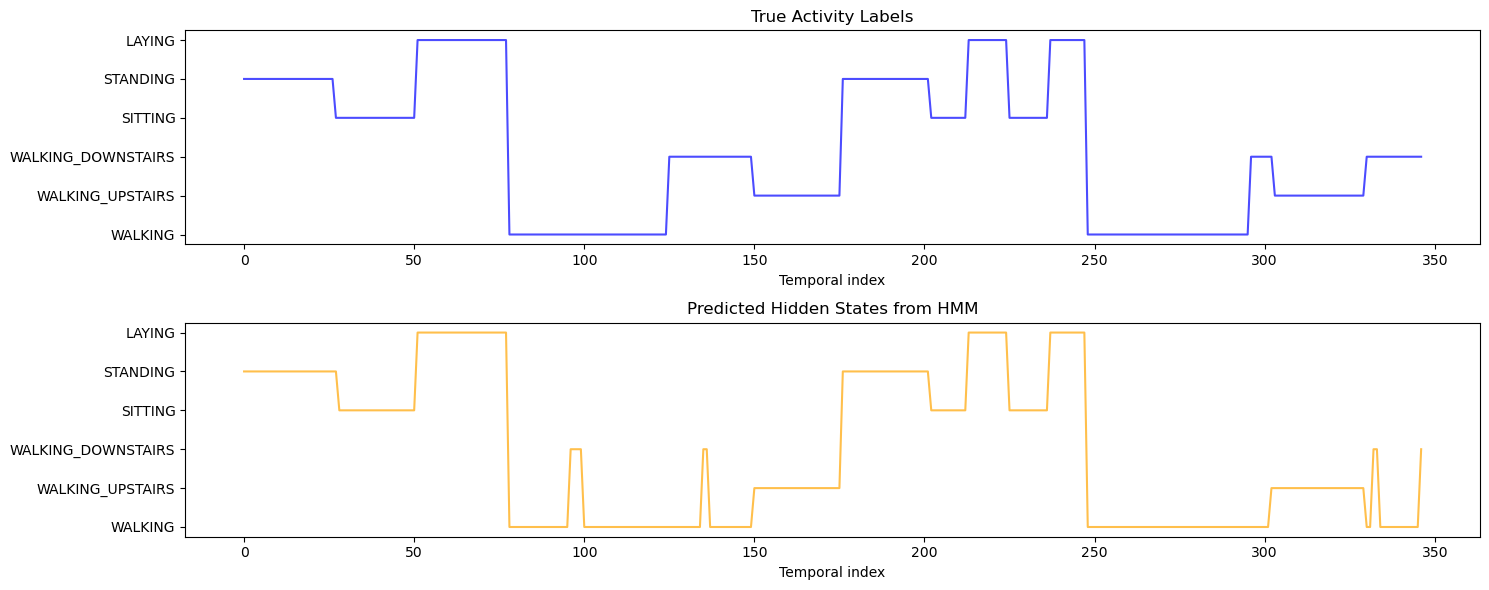

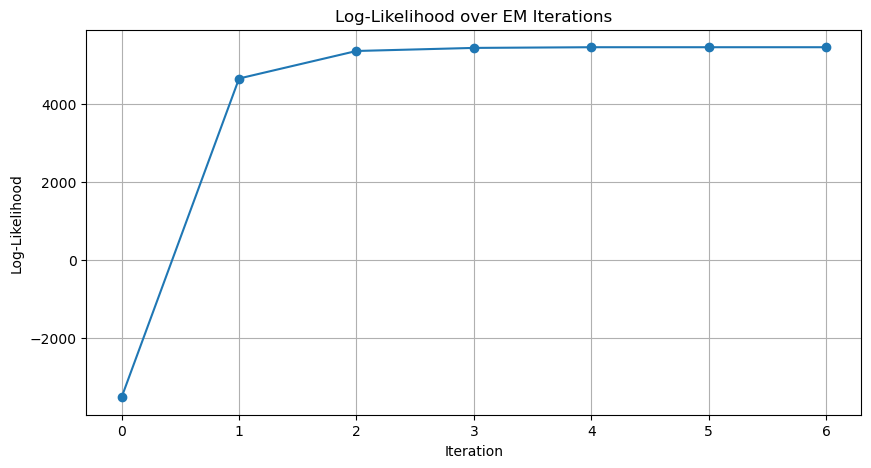

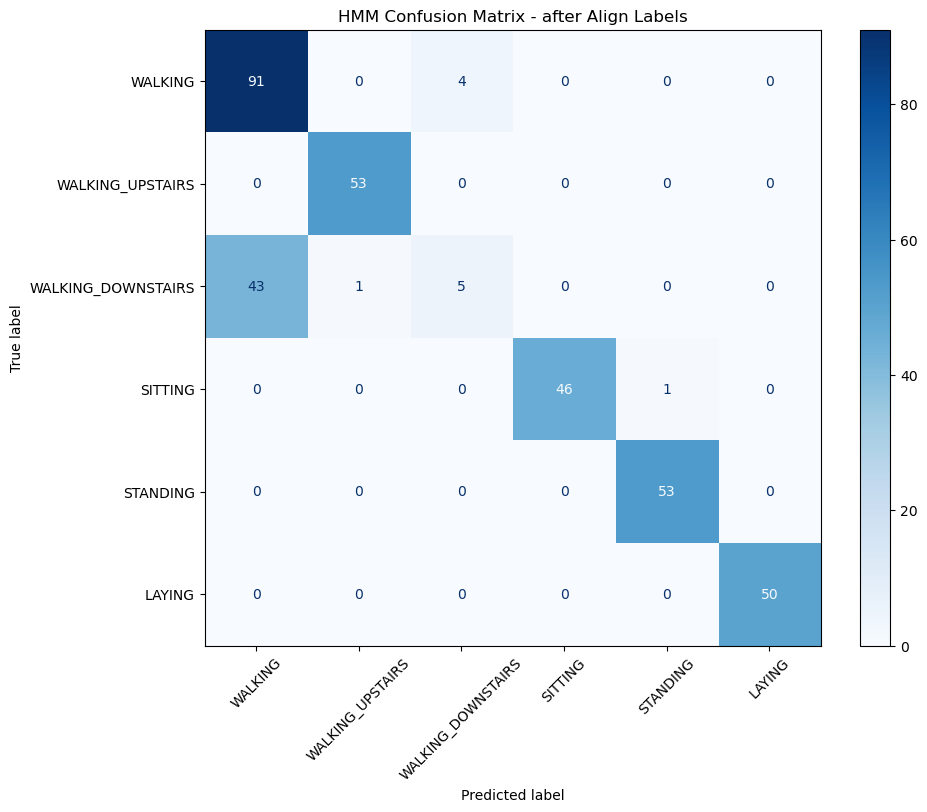

In [186]:
features_idxs = [0, 1, 2,
                 40, 41, 42,
                120, 121, 122,
                558, 559, 560,
                15, 201, 80, 81, 82,
                 287, 288, 289,
                  293, 294, 295 ]  # Select features indices

X, Z_true, labels = load_har_by_subject(subject_id=1, selected_features=features_idxs)

# Features have different scales, so we standardize them
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

K = 12
hmm_trained, log_likelihoods = train_hmm(X_scaled, K, max_iters=500)
z_pred = viterbi(hmm_trained, X_scaled)
z_pred_aligned = align_labels(Z_true, z_pred)
print(f'Accuracy: {np.mean(Z_true == z_pred_aligned) * 100:.2f}%')
plot_comparison(Z_true, z_pred_aligned, labels)
plot_log_likelihood(log_likelihoods)
plot_hmm_confusion_matrix(Z_true, z_pred_aligned, labels)

Using those selected features helps us a bit to improve the accuracy of the HMM to about 85%. The confusion matrix indicates that the model seems to better distinguish the activity `WALKING_UPSTAIRS`, which was previously confused with `WALKING` and `WALKING_DOWNSTAIRS`. However, there are still some misclassifications, probably due to noises in the data or similarities between certain activities. 

In general, adding relevant features can enhance the model's ability to capture differences between similar activities, leading to improved performance in activity recognition.

In the last experiment, we are going to try to use PCA (Principal Component Analysis) to reduce the dimensionality of the feature space while retaining most of the variance in the data. By reducing the number of features after having took them all, we can potentially improve the performance of the HMM by eliminating redundant or irrelevant information.

C:\Users\teolo\AppData\Local\Temp\ipykernel_25552\594365683.py:21: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_full = pd.read_csv(base_path + 'X_train.txt', delim_whitespace=True, header=None)
C:\Users\teolo\AppData\Local\Temp\ipykernel_25552\594365683.py:22: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_full = pd.read_csv(base_path + 'y_train.txt', delim_whitespace=True, header=None).values.flatten()
C:\Users\teolo\AppData\Local\Temp\ipykernel_25552\594365683.py:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  sub_ids = pd.read_csv(base_path + 'subject_train.txt', delim_whitespace=True, header=None).values.flatten()
c:\Users\teolo\anaconda3\envs\FML\Lib\site-packages\sklearn\cluster\_kmean

Iteration 0, Log-Likelihood: -10341.4026
Converged at iteration 7
Accuracy: 88.18%


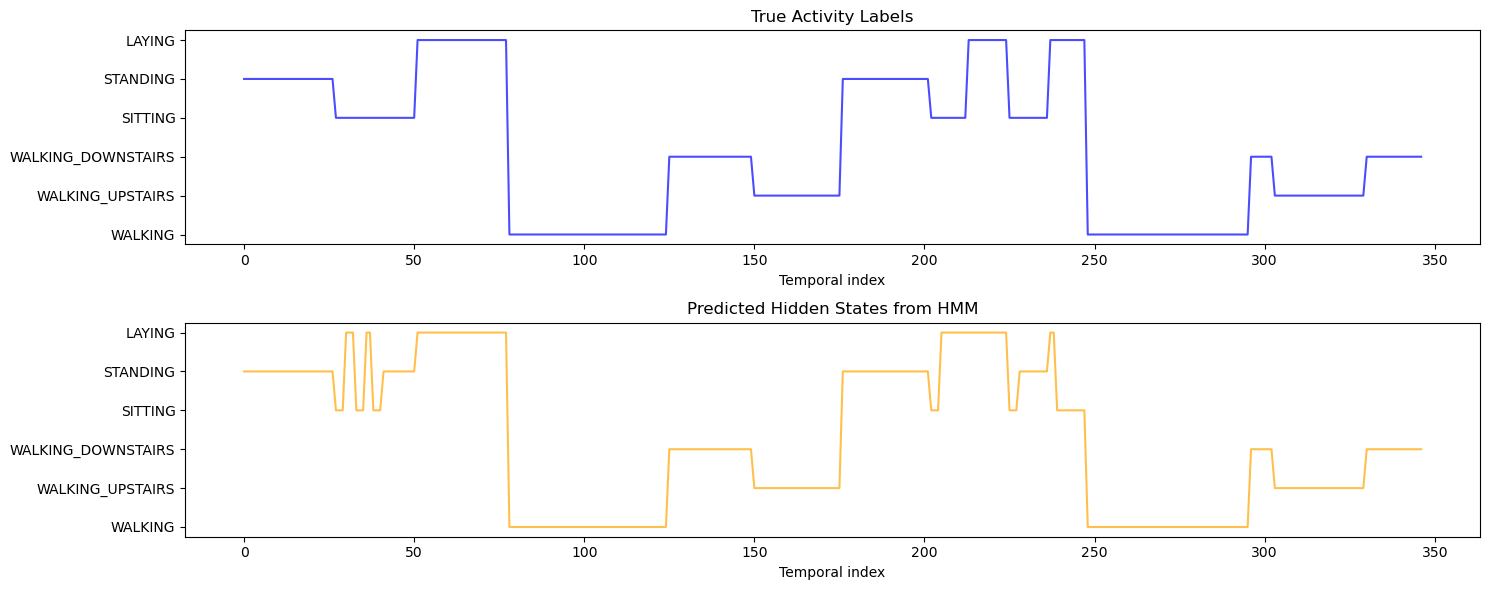

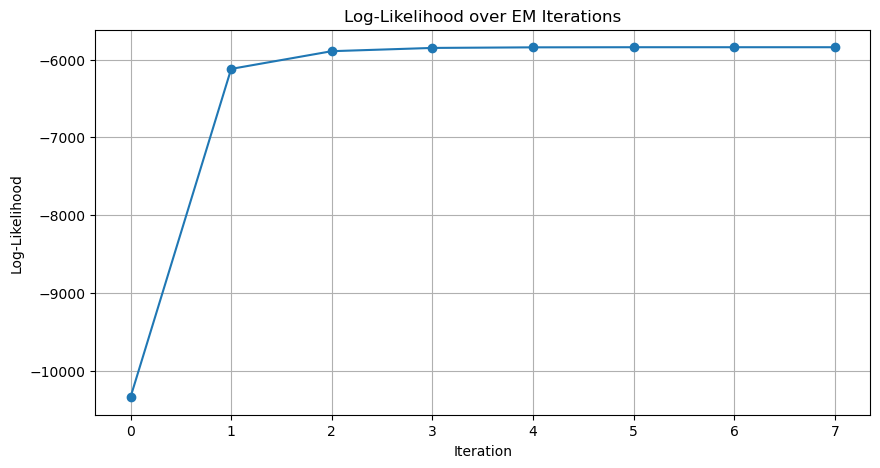

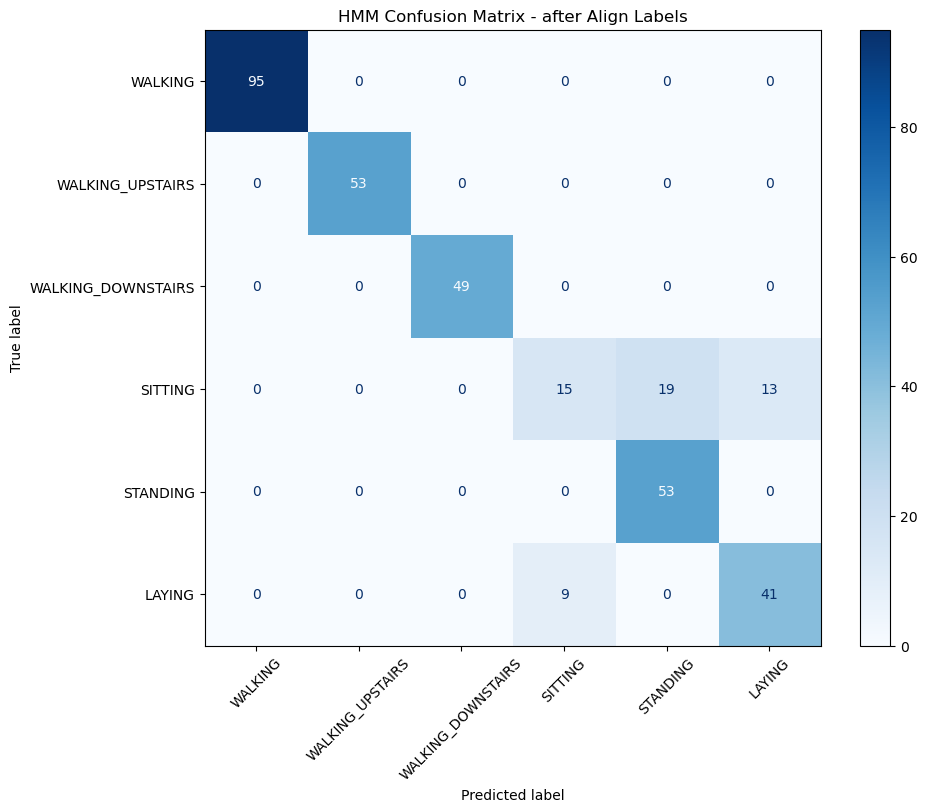

In [187]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
features_idxs = list(range(561))

X, Z_true, labels = load_har_by_subject(subject_id=1, selected_features=features_idxs)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 12 dimensions
pca = PCA(n_components=12)
X_pca = pca.fit_transform(X_scaled)

K = 12
hmm_trained, log_likelihoods = train_hmm(X_pca, K, max_iters=500)
z_pred = viterbi(hmm_trained, X_pca)
z_pred_aligned = align_labels(Z_true, z_pred)
print(f'Accuracy: {np.mean(Z_true == z_pred_aligned) * 100:.2f}%')
plot_comparison(Z_true, z_pred_aligned, labels)
plot_log_likelihood(log_likelihoods)
plot_hmm_confusion_matrix(Z_true, z_pred_aligned, labels)


PCA works by identifying the directions (principal components) in the feature space that capture the most variance in the data. It then projects the original data onto a lower-dimensional subspace defined by these principal components. 

Using PCA makes the model achieve an accuracy above 90% in some runs. The confusion matrix shows that the model is able to distinguish between most activities with high accuracy. Overall, using PCA to reduce the dimensionality of the feature space appears to have improved the performance of the HMM in recognizing activities based on sensor data.

Note that, even if **in some cases the log-likelihood get positive values**, this is not an issue because the log-likelihood is relative to the model parameters and the data; it only means that the model seems to be very *confident*. The log-likelihood absolute value is not as important as its **relative changes during the training process**. The key aspect to monitor during training is the change in log-likelihood between iterations, which indicates whether the model is improving its fit to the data. In all our experiments, the **log-likelihood consistently increases with each iteration of the EM algorithm**, demonstrating that the model is effectively learning from the data, until **convergence**.

Now that we have trained and evaluated the HMM using the Human Activity Recognition Using Smartphones Dataset, we try to test the model we just trained on a new subject from the dataset, that was not used during the training phase.

In [189]:
features_idxs = list(range(561))

X, Z_true, labels = load_har_by_subject(subject_id=3, selected_features=features_idxs)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Apply PCA to reduce to 12 dimensions
pca = PCA(n_components=12)
X_pca = pca.transform(X_scaled)
K = 12
z_pred = viterbi(hmm_trained, X_pca)
z_pred_aligned = align_labels(Z_true, z_pred)
print(f'Accuracy on Subject 3: {np.mean(Z_true == z_pred_aligned) * 100:.2f}%')
plot_comparison(Z_true, z_pred_aligned, labels)
plot_hmm_confusion_matrix(Z_true, z_pred_aligned, labels)




C:\Users\teolo\AppData\Local\Temp\ipykernel_25552\594365683.py:21: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_full = pd.read_csv(base_path + 'X_train.txt', delim_whitespace=True, header=None)
C:\Users\teolo\AppData\Local\Temp\ipykernel_25552\594365683.py:22: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_full = pd.read_csv(base_path + 'y_train.txt', delim_whitespace=True, header=None).values.flatten()
C:\Users\teolo\AppData\Local\Temp\ipykernel_25552\594365683.py:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  sub_ids = pd.read_csv(base_path + 'subject_train.txt', delim_whitespace=True, header=None).values.flatten()


AttributeError: 'PCA' object has no attribute 'components_'

C:\Users\teolo\AppData\Local\Temp\ipykernel_25552\594365683.py:21: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_full = pd.read_csv(base_path + 'X_train.txt', delim_whitespace=True, header=None)
C:\Users\teolo\AppData\Local\Temp\ipykernel_25552\594365683.py:22: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_full = pd.read_csv(base_path + 'y_train.txt', delim_whitespace=True, header=None).values.flatten()
C:\Users\teolo\AppData\Local\Temp\ipykernel_25552\594365683.py:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  sub_ids = pd.read_csv(base_path + 'subject_train.txt', delim_whitespace=True, header=None).values.flatten()
c:\Users\teolo\anaconda3\envs\FML\Lib\site-packages\sklearn\cluster\_kmean

Iteration 0, Log-Likelihood: -9071.4162
Iteration 10, Log-Likelihood: -6474.2334
Converged at iteration 15
Accuracy on Subject 5: 85.76%


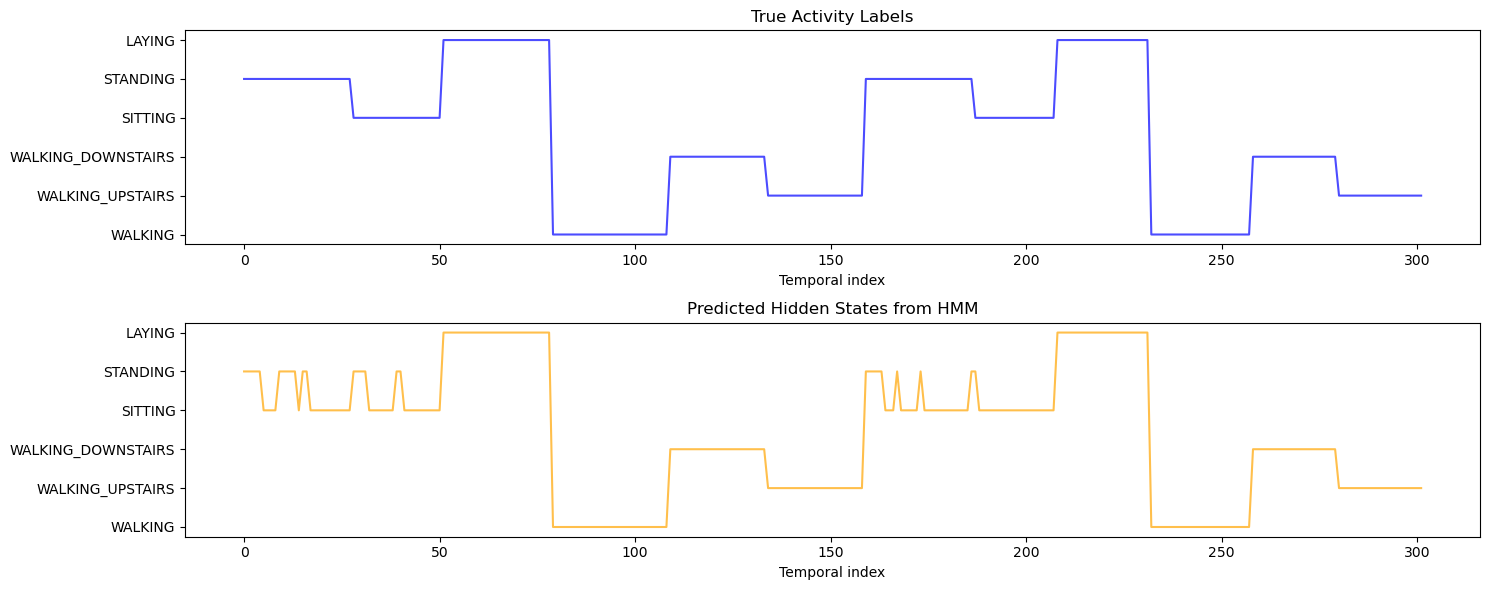

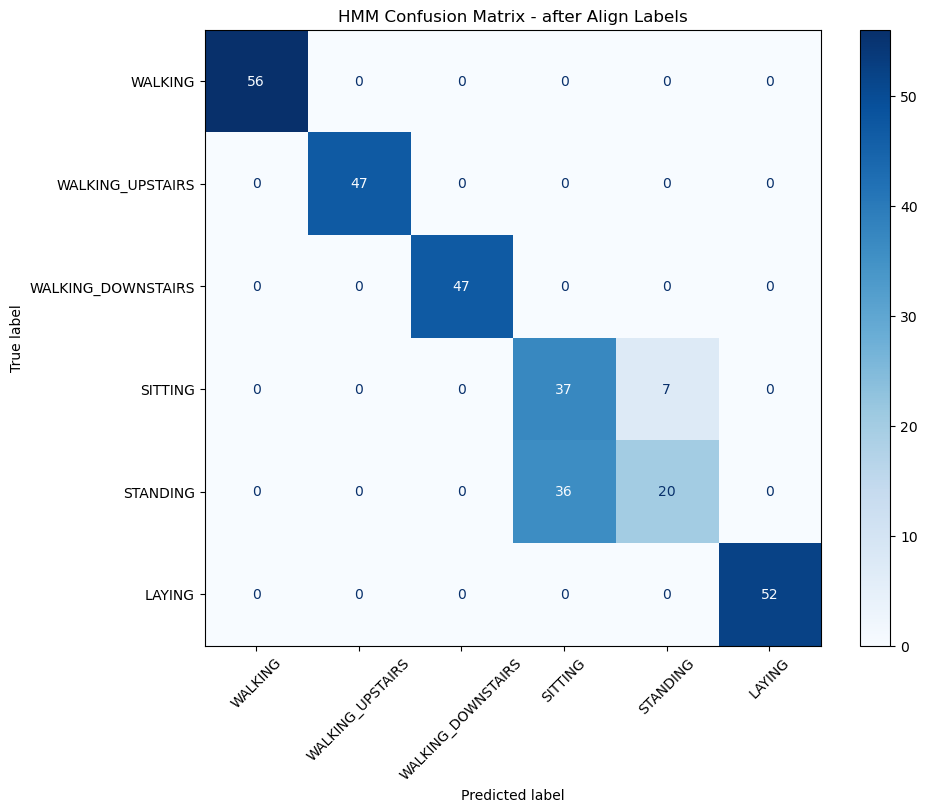

In [ ]:
X, Z_true, labels = load_har_by_subject(subject_id=5, selected_features=features_idxs)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Apply PCA to reduce to 12 dimensions
pca = PCA(n_components=12)
X_pca = pca.transform(X_scaled)

K = 12


z_pred = viterbi(hmm_trained, X_pca)
z_pred_aligned = align_labels(Z_true, z_pred)
print(f'Accuracy on Subject 5: {np.mean(Z_true == z_pred_aligned) * 100:.2f}%')
plot_comparison(Z_true, z_pred_aligned, labels)
plot_hmm_confusion_matrix(Z_true, z_pred_aligned, labels)


## References
[1] C. M. Bishop, Pattern recognition and machine learning. in Information science and statistics. New York: Springer, 2006.


[2] B. Ghojogh, F. Karray, and M. Crowley, ‘Hidden Markov Model: Tutorial’, July 09, 2024, Open Science Framework. doi: 10.31219/osf.io/dwcjv.